## Linear Regression
We start with a simple linear regression model: 

$$y = X\beta + e$$

where $y = (y_1,\dots, y_N )$ is an N-vector of responses, $X$ is an N$\times$P matrix of features whose ith row is x$_i$, and $e$ is a vector of model residuals. The goal is to estimate $\beta$, the unknown P-vector of regression coefficients.
    Let’s say we trust the precision of some observations more than others, and therefore decide to estimate $\beta$ by the principle of weighted least squares (WLS):
    
$$\hat{\beta} = \underset{\beta\in\mathbb{R}^{P}}{\operatorname{arg min}}\sum_{i=1}^{N} \frac{w_i}{2}(y_i-x_i^T\beta)^2$$

where $w_i$ is the weight for the observation $i$.

### (A) Rewrite the WLS objective function above in terms of vectors and matrices, and show that $\hat{\beta}$ is the solution to the following linear system of $P$ equations in $P$ unknowns:

$$ (X^TWX)\hat{\beta} = X^TWy $$

### *__Solution__*

 - Start by putting it in matrix form.
$$\hat{\beta} = \underset{\beta\in\mathbb{R}^{P}}{\operatorname{arg min}} \{(y-X\beta)^T W (y-X\beta)\}$$


$$0=\frac{W}{2}\{(y-X\beta)^T W (y-X\beta)\}$$
 - Foil.

$$0=\frac{W}{2}\{y^Ty-X^T\beta^Ty-y^TX\beta+X^T\beta^TX\beta\}$$
 - Reduce.

$$0=\frac{W}{2}\{y^Ty-2yX^T\beta^T+X^T\beta^TX\beta\}$$
 - Take the derivative with respect to beta, the thing doing the minimizing.

$$1) \frac{\partial\beta^TX^Ty}{\partial\beta} = X^Ty $$

 - The beta in this term is dropped.

$$2) \frac{\partial X^T\beta^TX\beta}{\partial\beta} = 2X^TX\beta$$

 - One of the betas in this term is dropped.
 

 - Now we can use these terms to plug them back into our original equation.

$$0=\frac{W}{2}\{-2X^Ty+2X^TX\hat{\beta}\}$$

 - Distribute our weighted term to make the solution a weighteded least squares (WLS) solution.

$$0=-X^TWy+X^TWX\hat{\beta}$$

 - Put into the form we want.

$$(X^TWX)\hat{\beta}=X^TWy$$

 - The derivation above allows us to solve the linear system of equations $y = X\beta + e$, that minimizes the $e$ term with respect to $\beta$. We can now solve for $\beta$:
 
$$\hat{\beta}=(X^TWX)^{-1}X^TWy$$

#### (B) 
One way to calculate $\hat{\beta}$ is to: (1) recognize that, trivially, the solution to the above linear system must satisfy $\hat{\beta}=(X^TWX)^{-1}X^TWy$ and (2) to calculate this directly, i.e. by inverting $X^TWX$. Let’s call this the “inversion method” for calculating the WLS solution. Numerically speaking, is the inversion method the fastest and most stable way to actually solve the above linear system? Do some independent sleuthing on this question. Summarize what you find, and provide pseudo-code for at least one alternate method based on matrix factorizations—call it “your method” for short. (Note: our linear system is not a special flower; whatever you discover about general linear systems should apply here.)

### *__Independent Sleuthing__*

*__Phrasing the problem in terms of matrix factorization__*: We can look at this problem in terms of linear algebra this is translated as solving the equation $Ax=b$, where $A=(X^TWX)^{-1}$, $b=y$, and $x=\beta$. Our main issue boils down to solving $(X^TWX)^{-1}$. Inverting this matrix is slow and can be unstable. But, from linear algebra there are many different matrix factorizations that solve $Ax=b$ by factoring $A$ into a set 2 or 3 special matrices.

*__Solutions to factorizations of A__*: This list isn't exhaustive but it will go through a few of the more common ones and describe on superficially how they work.
 * __LU Decomposition, $A=LU$__. This factorization uses gaussian elimination to get a lower triangular matrix $(L)$ and an upper triangular matrix $(U)$. Gaussian elimnation naturally produces an upper triangular matrix because are pivot columns produce zeros below the location of the pivot. The lower triangular matrix comes from multiplying the inverse of each elimination matrices. Thus, the L matrix is a larger matrix with all the product of all the inverse elimination matrices. We can then use forward and backward substitution to solve for b and x, respectively.
   * We can solve for $c$ in $Lc=b$ via forward substitution
   * We can solve for $x$ in $Ux=c$ via backwarrd subsitition
 
 
 * __Cholsky Decomponsition, $A=LL$__. -- ADD MORE HERE --
 
 
 * __QR Decomposition, $A=QR$__. This factorization uses the Gram-Schmidt process to iteratively create orthonormal columns vectors, which become matrix $Q$. An upper triangular matrix $R$ comes from $R=Q^TA$. $R$ is upper triangular because later $q$'s are orthogonal to later $a$'s. It is numerically slower than LU but more stable due to the $Q$ matrix.
  * $\hat{\beta}=(X^TWX)^{-1}X^TWy$ becomes $R^TW\hat{\beta}=Q^TWy$, which can be solved quickly with back substitution.
  
 
 * __SVD Decomposition, $A=U\lambda V^T$__. -- ADD MORE HERE --


*__Performance of different solutions__*:
We can measure the performance of these different factorization i.e. our solutions, based on two criteria: 
1. how stable is the solution regarding the calculations of $x$ or in our case $\hat{\beta}$?
2. how fast can these alternative solutions be calculated?


### *__Comparing Factorization Performance for solving $Ax=b$__*

In [421]:
import numpy as np
import time

from scipy import linalg as sla

def wMat( N ):
    return np.eye( N )

# classic inverse
def ls_inv( A ,b ):
    dim = A.shape
    W   = wMat( dim[0] )
    WA  = np.dot( W, A )
    Ainv = np.linalg.inv( WA )
    x    = np.dot( Ainv, b)
    return x

# lu decomposition
def ls_LU( A, b ):
    dim = A.shape
    W   = wMat( dim[0] )
    WA  = np.dot( W, A )
    P,L,U = sla.lu( WA )
    c   = sla.solve_triangular( L, b, trans=0, lower=True ) # forward solve
    x   = sla.solve_triangular( U, c, trans=0, lower=True ) # backward solve
    return x
    
# qr decomposition
def ls_QR( A, b ):
    dim = A.shape
    W   = wMat( dim[0] )
    WA  = np.dot( W, A )
    Q,R = sla.qr( WA )
    QTb = np.dot(Q.T, b) # combine the right side of the equation
    x   = sla.solve_triangular( R, QTb, trans=0, lower=False  ) # forward solve
    return x

# compare methods
def compare_methods(iterations=300):
    elapsed_mat = np.zeros([ 3, iterations ])
    for iter in range( iterations ):

        #simulates a square matrix (what we will have in our least-squares problem)
        N = 100 + ( iter*5 )
        P = 100 + ( iter*5 )
        A = np.random.rand( N, P )
        b = np.random.rand( N, 1 )

        # comparison on different data set sizes 
        s = time.time()
        ls_inv( A, b )
        elapsed = time.time() - s
        elapsed_mat[0, iter] = elapsed

        s = time.time()
        ls_LU( A, b )
        elapsed = time.time() - s
        elapsed_mat[1, iter] = elapsed

        s = time.time()
        ls_QR( A, b )
        elapsed = time.time() - s
        elapsed_mat[2, iter] = elapsed

    return elapsed_mat

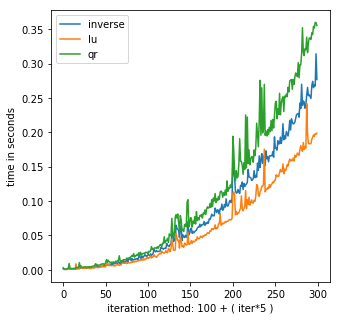

In [423]:
import numpy as np
import matplotlib.pyplot as plt

elapsed = compare_methods( iterations=300 )

plt.figure( 1, figsize=(5, 5) )
plt.plot( elapsed[0,:], label="inverse" )
plt.plot( elapsed[1,:], label="lu" )
plt.plot( elapsed[2,:], label="qr" )
plt.legend()
plt.xlabel( " iteration method: 100 + ( iter*5 ) " )
plt.ylabel( " time in seconds ")
plt.show()


We can see that QR actually takes the longest. But, given that it works by creating orthonormal column vectors it is actually the most stable. 

### *_Implement Sparse Matrices Problem and Solution_*

In [425]:
# this section still a work in progress...
n=100
s=0.1
b    = np.random.rand( n, 1 )
mask = np.random.binomial( 1, s, ( n, n ) )
mat  = np.random.rand( n, n )
A    = mask*mat

#compare_methods_sparse()

### *__Comparing matrix factorizations with sparse matrices.__*

## Generalized Linear Models
As an archetypal case of a GLM, we’ll consider the binomial logistic regressionmodel: $yi ∼$ Binomial($m_i$,$w_i$), where $y_i$ is an integer number of “successes,” $m_i$ is the number of trials for the $i$th case, and the success probability $w_i$ is a regression on a feature vector $x_i$ given by the inverse logit transform:

$$w_i = \frac{1}{1+\exp\{-x_i^T\beta\}} $$

We want to estimate $\beta$ by the principle of maximum likelihood. Note: for binary logistic regression, $m_i = 1$ and $y_i$ is either 0 or 1.
#### A. Derive Gradient

(this section could use a bit of cleaning up towards the end)

Start with the negative log likelihood and simplify your expression as much as possible. This is the thing we want to minimize to compute the MLE. Derive the gradient of this expression, $\vee l(\beta)$. Note: your gradient will be a sum of terms $l_i(\beta)$, and it’s OK to use the shorthand (just below) in your expression.

$$w_i(\beta) = \frac{1}{1+\exp\{-x_i^T\beta\}} $$ 

 - We start with...
$$ \nabla l(\beta) = - log\{ \prod_{i=1}^{N}p(y_i|\beta) \} $$

 - Our response can be either 0 or 1, therefore we have to represent the probability of either case occuring given our betas.
 
$$\nabla l(\beta) = - log\{ \prod_{i=1}^{N} p(y_i | \beta) (1-p(y_i | \beta)) \} $$

 - The product of logs is equal to the sum of log products. 

$$ \nabla l(\beta) = - [ \sum_{i=1}^{N} y_i log( w_i(\beta) )+ (1-y_i)log(1-w_i(\beta) ] $$

 - Now we need the derivation of a sigmoid function.
 
$$g(z) = \frac{1}{1+\exp^{-\beta^TX}}$$

 - derive the sigmoid with respect to beta
 
$$g(\beta) = \frac{1}{1+\exp^{-\beta^TX}}$$

$$\frac{d}{d\beta} = \frac{d}{d\beta}(\frac{1}{1+exp^{-\beta^TX}})$$

$$ = \frac{d}{d\beta}({1+exp^{-\beta^TX}})^{-1} $$

 - the chain rule gives us
 
$$ = -({1+exp^{-\beta^TX}})^{-2}(-exp^{-\beta^TX})$$

 - simplify

$$ = \frac{exp^{-\beta^TX}} {(1+exp^{-\beta^TX})^{2}}$$

$$ =\frac{1}{(1+exp^{-\beta^TX})} . (\frac{1+exp^{-\beta^TX}}{1+exp^{-\beta^TX}}-\frac{1}{{1+exp^{-\beta^TX}}}) $$

$$ =\frac{1}{(1+exp^{-\beta^TX})} . (1-\frac{1}{{1+exp^{-\beta^TX}}}) $$

 - back to an original form

$$g(\beta).(1-g(\beta))$$

$$l(\beta) = - [ \sum_{i=1}^{N} y_i log( w_i(\beta) )+ (1-y_i)log(1-w_i(\beta) ] $$

 - combining the above equations and simplifying we get:
 
$$l(\beta) = - [ \sum_{i=1}^{N} y_i \beta^TX + log(1-\beta^TX) ] $$

 - we then take the derivative with respect to beta
 
$$1.\frac{\partial l(\beta)}{\partial \beta}=y_i\beta^TX$$

$$\frac{\partial l(\beta)}{\partial \beta}=y_iX$$

$$2.\frac{\partial l(\beta)}{\partial \beta}=log(1-\beta^TX)$$

$$\frac{\partial l(\beta)}{\partial \beta}= \frac{x.exp^{-\beta^TX}}{1+exp^{-\beta^TX}} $$

$$ = \sum_{i=1}^{N} y_iX - w_i(\beta)*X $$

$$ \frac{\partial l(\beta)}{\partial \beta} = \sum_{i=1}^{N} (y_i - w_i(\beta))X $$


### *__Implementing Gradient Descent__*

Read up on the method of steepest descent, i.e. gradient descent, in Nocedal and Wright (see course website). Write your own function that will fit a logistic regression model by gradient descent. 

 - add intercept term
 - make code modular
 - at each step, store the cost log-likelihood value
 - Be clever about gradient descent step size.

In [2]:
import numpy as np
from sklearn.preprocessing import scale

def sigmoid( z ):
    """ This shrinks our beta estimate into logistic form """
    return 1 / ( 1 + np.exp( -z ) )
    
def cost_ll( X, y, betas ):
    """ """
    # this is the current estimate
    p = sigmoid( np.dot( betas, X.T ) )
    
    # this measures the difference between the guess and the actual
    return -np.sum( y*np.log( p ) + (1-y)*np.log( 1 - p ) ) 

def gradient( X, y, betas ):
    """ This calculates the gradient given X, y and our betas """
    return np.dot( ( y - sigmoid( np.dot( X, betas ) ) ), X )

def convergence( alpha=None, method=None, convergence_history=None ):
    """  """
    if len( convergence_history ) < 5:
        return 1

    diff = convergence_history[-2] - convergence_history[-1]
    
    # this is an attempt to adjust the criterion for convergence based upon the method we are using
    # needs work
    if method is 'newton':
        # we can use a strict criterion because newton's method should give us an exact response
        criterion = 0.01
    elif method is 'gradient' and alpha is not None:
        # gradient
        criterion = alpha*5 #???
    else:
        return print("must specify convergence method and potentially a learning rate input")

    if diff < criterion:
        check=0
    else:
        check=1

    return check

def logitReg( X, y, iterations=1000, scale_data=True, alpha=0.01, add_intercept=True, verbose=0 ):
    """ This function performs 'simple' gradient descent.
        - X is the data matrix - X is scaled before performing descent
        - y are the actual values 
        - beta vector is initialized at a vector of zeros 
        - alpha or the learning rate is by default 0.00001 """

    # scaling X, i.e. centered to zero and divided by std dev.
    if scale_data:
        X = scale( X )
        if verbose:
            print( " Scaling X column-wise, mean=0, divided by std ")

    # add column of 1s to intercept
    if sum( X[:,0] ) is not len( X[:,0] ) and add_intercept:
        intercept = np.ones( (X.shape[0], 1) )
        X = np.hstack( ( intercept, X ) )
        if verbose:
            print( "adding intercept" )
        
    # initialize betas vector
    betas = np.zeros( X.shape[1] )
    
    # initialize empty convergence vector and empty convergence difference vector
    cvg = []; check=1; step=0
    betas_hist = np.zeros([ len( betas ), iterations ])
    while check is 1:
        # ammend to adjust alpha based on iteration step
        betas += alpha * gradient( X, y, betas )
        betas_hist[:,step]=betas
        
        # save log likelihood output for plotting
        cvg.append( cost_ll( X, y, betas ) )
        
        # check for convergence
        #check = convergence( alpha=alpha, method='gradient', convergence_history=cvg )
        
        # so we don't go on forever
        if (step+1) > (iterations-1):
            check=0
        step+=1
    
    return betas, betas_hist, cvg

def predict( X, y, betas, add_intercept=True, verbose=0 ): 
    # process data
    X = preprocessing.scale( X )
    if verbose:
        print( " Scaling X column-wise, mean=0, divided by std ")
    
    # add column of 1s to intercept
    if add_intercept:
        intercept = np.ones( (X.shape[0], 1) )
        X = np.hstack( ( intercept, X ) )
    # guess
    p = sigmoid( np.dot( X, betas ) )
    
    # see how the guess managed
    test = [ 1 if t >= 0.5 else 0 for t in p ] 
    cor = [ 1 if ( t == y ) else 0 for t, y in zip( test, y ) ] 
    acc = sum( map( int, cor ) ) / len( cor )
    if verbose:
        print( " accuracy = %d percent "%(acc*100) )
    return acc

/Users/anthonydutcher/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/Users/anthonydutcher/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/Users/anthonydutcher/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


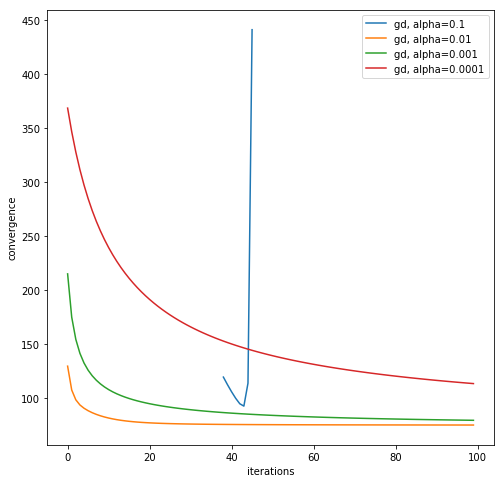

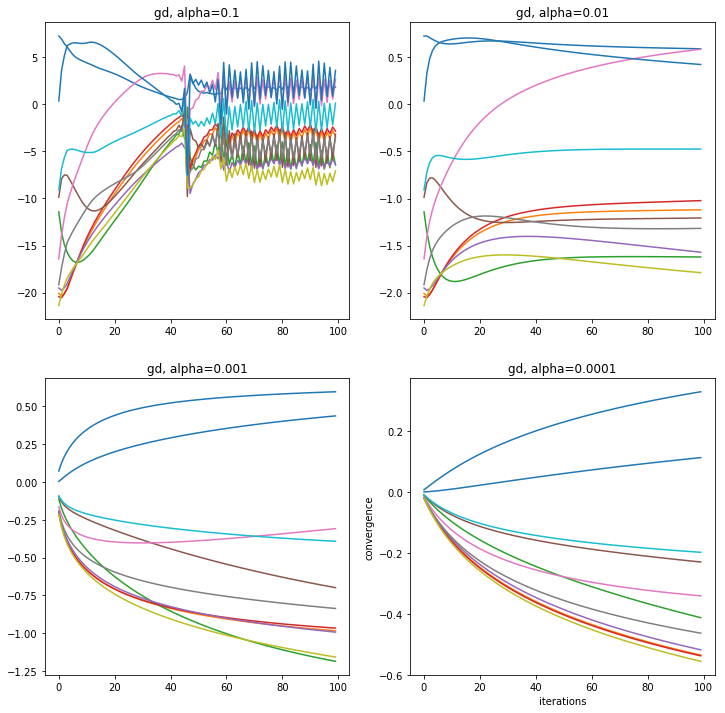

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# load data
data = pd.read_csv( "wdbc.txt", delimiter=",", header=None)

# shape data
X = data.iloc[:,2:12].values 
y = np.where( data.iloc[:,1].values == 'B', 1, 0 )

betas0, betas_hist0, cvg0 = logitReg( X, y, iterations=100, alpha=0.1 )
betas1, betas_hist1, cvg1 = logitReg( X, y, iterations=100, alpha=0.01 )
betas2, betas_hist2, cvg2 = logitReg( X, y, iterations=100, alpha=0.001 )
betas3, betas_hist3, cvg3 = logitReg( X, y, iterations=100, alpha=0.0001 )

# plot convergence
plt.figure( 1, figsize=(8, 8) )
plt.plot( cvg0, label="gd, alpha=0.1" )
plt.plot( cvg1, label="gd, alpha=0.01" )
plt.plot( cvg2, label="gd, alpha=0.001" )
plt.plot( cvg3, label="gd, alpha=0.0001" )
plt.xlabel( 'iterations' )
plt.ylabel( 'convergence' )
plt.legend()

# plot betas
fig, ax = plt.subplots( 2, 2, figsize=(12, 12) )
ax[0,0].plot( betas_hist0.T )
ax[0,0].set_title( "gd, alpha=0.1" )
ax[0,1].plot( betas_hist1.T )
ax[0,1].set_title( "gd, alpha=0.01" )
ax[1,0].plot( betas_hist2.T )
ax[1,0].set_title( "gd, alpha=0.001" )
ax[1,1].plot( betas_hist3.T )
ax[1,1].set_title( "gd, alpha=0.0001" )

plt.xlabel( 'iterations' )
plt.ylabel( 'convergence' )
plt.legend()
plt.show()

*__Remarks on gradient descent method.__*
 - This method overall works best for large datasets where matrix factorizations can be costly.
 
 - This method is sensitive the learning rate. Larger learning rates allow you to step to the convergence level quicker but if the learning rate is too large weird things happen (see above). At the same time, if the learning rate is too small, it may take too long to converge. Often a bit of experimentation is needed to find that correct learning rate. 
 
>We can also adjust alpha, or the learning rate in a more sophisticated manner: see **_Robins-Monroe_** method (discussed later).
 
 - The check for convergence needs a little work, the formula I have will work but doesn't seem to be robust for other datasets. ** I need to look at percent change of convergences at each step. ** 
>Often these algorithms actually are run this way look across the history of convergences or the cost to see if the convergence is changing. If not, then the program is exited. 

 - Next we are interested in taking the second order derivative, the hessian, which will tell us about the curvature of this function defined by the data. 

### *__Newton's Method__* (still need to add the proof!!)

Now consider a point $\beta_0 \set R^P$, which serves as an intermedi- ate guess for our vector of regression coefficients. Show that the second-order Taylor approximation of l(β), around the point β0, takes the form
Newton's method and using the second derivative

### *__Implementing Newton's Method__*

In [39]:
import numpy as np
from sklearn.preprocessing import scale

def sigmoid( z ):
    """ This shrinks our beta estimate into logistic form """
    return 1 / ( 1 + np.exp( -z ) )
    

def cost_ll( X, y, betas ):
    """ """
    # this is the current estimate
    p = sigmoid( np.dot( betas, X.T ) )
    
    # this measures the difference between the guess and the actual
    #return np.sum( y*np.log( p ) + (1-y)*np.log( 1 - p ) ) 
    return -np.sum( y*np.log( p ) + (1-y)*np.log( 1 - p ) ) 


def gradient( X, y, betas ):
    """ This calculates the gradient given X, y and our betas """
    return np.dot( ( y - sigmoid( np.dot( X, betas ) ) ), X )


def hessian( X, y, betas ):
    """
    Newtons method creates a weight matrix based on the 2nd derivative of each beta 
    """
    z   = sigmoid( np.dot( X, betas ) )
    W   = -np.diag( np.multiply( z, ( 1-z ) ) )
    #W   = np.diag( np.multiply( z, ( 1-z ) ) )
    H   = np.dot( X.T, np.dot( W, X ) )
    return H


def convergence( alpha=None, method=None, convergence_history=None ):
    """  """
    if len( convergence_history ) < 5:
        return 1
    elif np.isnan(convergence_history[-1]):
        print( "nan returned during convergence check")
        return 0

    diff = convergence_history[-2] - convergence_history[-1]
    
    # this is an attempt to adjust the criterion for convergence based upon the method we are using
    # needs work
    if method is 'newton':
        # we can use a strict criterion because newton's method should give us an exact response
        criterion = 0.01
    elif method is 'gradient' and alpha is not None:
        # gradient
        criterion = alpha*5 #???
    else:
        return print("must specify convergence method and potentially a learning rate input")

    if diff < criterion:
        check=0
    else:
        check=1

    return check

def logitRegNewt( X, y, iterations=50, verbose=0):
    """  """
    # scaling X, i.e. centered to zero and divided by std dev.
    X = scale( X )

    # add column of 1s to intercept
    if sum( X[:,0] ) is not len( X[:,0] ):
        intercept = np.ones( (X.shape[0], 1) )
        X = np.hstack( ( intercept, X ) )
    
    # initialize betas vector
    betas = np.zeros( X.shape[1] )
    
    # initialize empty convergence vector and empty convergence difference vector
    cvg = []; step=0; check=1
    betas_hist = np.zeros([ len( betas ), iterations ])
    while check is 1:
        # newtons method for gradient descent.
        print( step )
        # take the invers of the hession matrix
        hinv = np.linalg.inv( hessian( X, y, betas ) )
        
        # take the gradient
        g = gradient( X, y, betas )
        
        # use the inverse hessian and the gradient to compute the betas
        betas = betas - np.dot( hinv, g )
        betas_hist[:,step]=betas.T

        # save log likelihood output for plotting
        cvg.append( cost_ll( X, y, betas ) )

        # check for convergence 
        check = convergence( alpha=None, method='newton', convergence_history=cvg )
        
        # so we don't go on forever
        if step > iterations:
            check=0
        step+=1

    return betas, betas_hist, cvg

def predict( X, y, betas, add_intercept=True, verbose=0 ): 
    # process data
    X = preprocessing.scale( X )
    if verbose:
        print( " Scaling X column-wise, mean=0, divided by std ")
    
    # add column of 1s to intercept
    if add_intercept:
        intercept = np.ones( (X.shape[0], 1) )
        X = np.hstack( ( intercept, X ) )
        
    # guess
    p = sigmoid( np.dot( X, betas ) )
    
    # see how the guess managed
    test = [ 1 if t >= 0.5 else 0 for t in p ] 
    cor = [ 1 if ( t == y ) else 0 for t, y in zip( test, y ) ] 
    acc = sum( map( int, cor ) ) / len( cor )
    if verbose:
        print( " accuracy = %d percent "%(acc*100) )
    return acc

0
1
2
3
4
5
nan returned during convergence check


/Users/anthonydutcher/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/Users/anthonydutcher/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


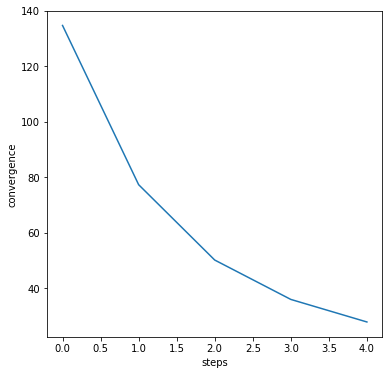

In [42]:
import numpy as np
import pandas as pd
import time
from sklearn import datasets

# make some simulated data
data = datasets.load_breast_cancer( )
X = np.asarray( data.data )
y = np.asarray( data.target )

# load data real data
data = pd.read_csv( "wdbc.txt", delimiter=",", header=None)

# shape data
XX = data.iloc[:,2:12].values 
yy = np.where( data.iloc[:,1].values == 'B', 1, 0 )

# run newton's method
betas, betas_hist, cvg = logitRegNewt( X, y, iterations=100, verbose=0)

# plot
plt.figure( 1, figsize=( 6, 6) )
plt.plot( cvg )
plt.xlabel( 'steps' )
plt.ylabel( 'convergence' )
plt.show()

Reflect broadly on the tradeoffs inherent in the decision of whether to use gradient descent or Newton’s method for solving a logistic regression problem.

The main trade-offs we get when comparing gradient Descent with Newton's method refers to time and computational resources.

Gradient descent can be easily implemented. However, it can take many iterations to ultimately converge. 